# Limpieza de datos

La entrada de este algoritmo son los datos procesados provenientes del archivo $ProcesamientoDatosCrudos.ipynb$, estos se encuentran en un archivo de excel. Lo que hace el algoritmo es crear las variables dummies necesarias, pasar a binario las variables categóricas con 2 tipos, agrupar las marcas poco frecuentes, transformar la variable "VEHICLE_YEAR" en "ANTIQUITY", omitir la variable "MODEL" y eliminar los outliers. La salida es un archivo de excel con la infomación descrita, la cual sera usada para implementar los diferentes modelos.

### Importamos las librerías necesarias

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [34]:
plt.rcParams['figure.facecolor'] = 'white'

### Importamos los datos procesados por $ProcesamientoDatosCrudos.ipynb$

In [35]:
df = pd.read_excel('datos_procesados.xlsx')
df

,Unnamed: 0,price,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,VEHICLE_YEAR,TRACTION_CONTROL
0,3459,70000000,Mercedes-Benz,4,2000,Gasolina,99000,Clase E,Automática,2011,Delantera
1,2330,40000000,Ford,2,5000,Gasolina,159780,Mustang,Automática,1979,Delantera
2,2609,43000000,Mercedes-Benz,4,2000,Gasolina,100500,Clase E,Automática,2003,Delantera
3,2611,52000000,Chevrolet,4,1000,Gasolina,73000,Tracker,Mecánica,2016,4x2
4,2616,52000000,Toyota,4,2000,Gasolina,165000,Rav4,Automática,2006,4x4
...,...,...,...,...,...,...,...,...,...,...,...
9538,10038,99000000,BMW,4,1000,Gasolina,24000,Serie 2,Automática,2019,4x2
9539,10040,36900000,Suzuki,4,1000,Gasolina,66000,Celerio,Automática,2015,Delantera
9540,10043,179900000,Mercedes-Benz,4,2000,Diésel,47000,Clase Gle,Automática,2019,4x4
9541,10045,52990000,Ford,4,1000,Gasolina,60100,Fiesta,Automática,2017,Delantera


### Agrupamos las marcas con poca frecuencia en una variable llamada "Otra"

In [36]:
def splt (brand):
    return brand.split(' ')[0]
    
df['BRAND'] = df['BRAND'].apply(splt)

In [62]:
count = df['BRAND'].value_counts()
cnt = pd.DataFrame(count)

In [63]:
main_brands = cnt[cnt['BRAND'] >= 20].index.to_list()
main_brands

['Toyota',
 'Chevrolet',
 'Renault',
 'Ford',
 'Mazda',
 'Volkswagen',
 'Nissan',
 'Kia',
 'Mercedes-Benz',
 'BMW',
 'Suzuki',
 'Hyundai',
 'Audi',
 'Otra',
 'Jeep',
 'Dodge',
 'Mitsubishi',
 'Volvo',
 'Honda',
 'Citroën',
 'Mini',
 'Fiat',
 'Peugeot',
 'Land',
 'Subaru',
 'Porsche',
 'SEAT',
 'Ssangyong',
 'Lexus']

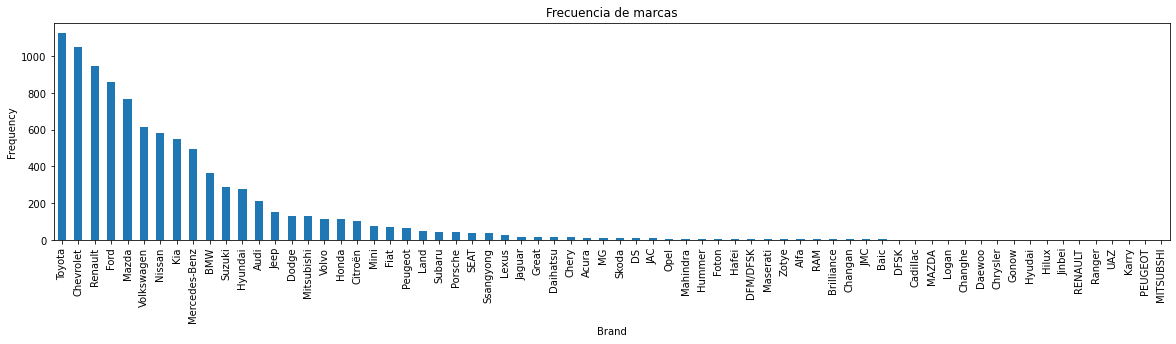

In [40]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [20, 4]

df['BRAND'].value_counts().plot(kind='bar', xlabel='Brand', ylabel='Frequency')
plt.title('Frecuencia de marcas')
plt.show()

In [41]:
def other_brands (brand,main_brands):
    if brand in main_brands:
        return brand
    else:
        return 'Otra'

In [42]:
df['BRAND'] = df['BRAND'].apply(other_brands,args=([main_brands]))

### Pasamos a binario las variables categóricas con dos categorías

In [43]:
df = df.replace(to_replace ="Delantera",value =1)
df = df.replace(to_replace ="Trasera",value =1)
df = df.replace(to_replace ="4x2",value =1)
df = df.replace(to_replace ="4x4",value =0)
df = df.replace(to_replace = 4,value =1)
df = df.replace(to_replace = 2,value =0)
df = df.replace(to_replace ="Automática",value =1)
df = df.replace(to_replace ="Automática secuencial",value =1)
df = df.replace(to_replace ="Mecánica",value =0)

### Transformamos la variable "VEHICLE_YEAR" en "ANTIQUITY"

In [44]:
def format_year (year,max_year):
    return max_year - year

In [45]:
max_year = max(df['VEHICLE_YEAR'])

In [46]:
df['VEHICLE_YEAR'] = df['VEHICLE_YEAR'].apply(format_year,args=([max_year]))

In [47]:
df = df.rename(columns={"VEHICLE_YEAR":"ANTIQUITY"})

### Creamos las variables dummies necesarias en las variables categóricas con más de 2 categorías

In [48]:
df_one_hot = pd.get_dummies(df, columns=['FUEL_TYPE','BRAND'])

In [49]:
df_one_hot

,Unnamed: 0,price,DOORS,ENGINE,KILOMETERS,MODEL,TRANSMISSION,ANTIQUITY,TRACTION_CONTROL,FUEL_TYPE_Diésel,...,BRAND_Peugeot,BRAND_Porsche,BRAND_Renault,BRAND_SEAT,BRAND_Ssangyong,BRAND_Subaru,BRAND_Suzuki,BRAND_Toyota,BRAND_Volkswagen,BRAND_Volvo
0,3459,70000000,1,2000,99000,Clase E,1,12,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2330,40000000,0,5000,159780,Mustang,1,44,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2609,43000000,1,2000,100500,Clase E,1,20,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2611,52000000,1,1000,73000,Tracker,0,7,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2616,52000000,1,2000,165000,Rav4,1,17,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,10038,99000000,1,1000,24000,Serie 2,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0
9539,10040,36900000,1,1000,66000,Celerio,1,8,1,0,...,0,0,0,0,0,0,1,0,0,0
9540,10043,179900000,1,2000,47000,Clase Gle,1,4,0,1,...,0,0,0,0,0,0,0,0,0,0
9541,10045,52990000,1,1000,60100,Fiesta,1,6,1,0,...,0,0,0,0,0,0,0,0,0,0


### Eliminamos las variables innecesarias para los modelos a implementar

In [50]:
del df_one_hot["MODEL"]

In [51]:
del df_one_hot["Unnamed: 0"]

In [52]:
df_one_hot

,price,DOORS,ENGINE,KILOMETERS,TRANSMISSION,ANTIQUITY,TRACTION_CONTROL,FUEL_TYPE_Diésel,FUEL_TYPE_Eléctrico,FUEL_TYPE_Gasolina,...,BRAND_Peugeot,BRAND_Porsche,BRAND_Renault,BRAND_SEAT,BRAND_Ssangyong,BRAND_Subaru,BRAND_Suzuki,BRAND_Toyota,BRAND_Volkswagen,BRAND_Volvo
0,70000000,1,2000,99000,1,12,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,40000000,0,5000,159780,1,44,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,43000000,1,2000,100500,1,20,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,52000000,1,1000,73000,0,7,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,52000000,1,2000,165000,1,17,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,99000000,1,1000,24000,1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9539,36900000,1,1000,66000,1,8,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9540,179900000,1,2000,47000,1,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9541,52990000,1,1000,60100,1,6,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Eliminación de Outliers

/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Antes de remover outliers')

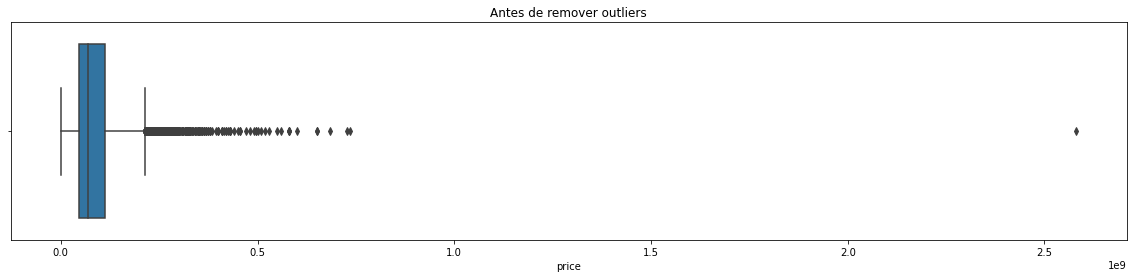

In [53]:
sns.boxplot(df_one_hot['price']).set_title('Antes de remover outliers')

In [54]:
df_one_hot['price'].quantile([.85, .90])

0.85    146997000.0
0.90    171998000.0
Name: price, dtype: float64

In [55]:
without_out_liers = df_one_hot[df_one_hot['price'] <= 171998000.0]

/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Después de remover outliers')

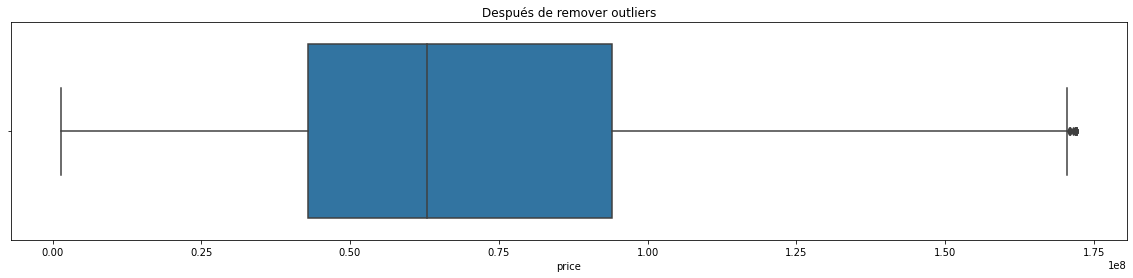

In [56]:
sns.boxplot(without_out_liers['price']).set_title('Después de remover outliers')

# Otros

In [57]:
columns_names = without_out_liers.columns.values
eqn = '+'.join(columns_names)
print(eqn)

price+DOORS+ENGINE+KILOMETERS+TRANSMISSION+ANTIQUITY+TRACTION_CONTROL+FUEL_TYPE_Diésel+FUEL_TYPE_Eléctrico+FUEL_TYPE_Gasolina+FUEL_TYPE_Gasolina y gas+FUEL_TYPE_Híbrido+BRAND_Audi+BRAND_BMW+BRAND_Chevrolet+BRAND_Citroën+BRAND_Dodge+BRAND_Fiat+BRAND_Ford+BRAND_Honda+BRAND_Hyundai+BRAND_Jeep+BRAND_Kia+BRAND_Land+BRAND_Lexus+BRAND_Mazda+BRAND_Mercedes-Benz+BRAND_Mini+BRAND_Mitsubishi+BRAND_Nissan+BRAND_Otra+BRAND_Peugeot+BRAND_Porsche+BRAND_Renault+BRAND_SEAT+BRAND_Ssangyong+BRAND_Subaru+BRAND_Suzuki+BRAND_Toyota+BRAND_Volkswagen+BRAND_Volvo


In [58]:
columns_names

array(['price', 'DOORS', 'ENGINE', 'KILOMETERS', 'TRANSMISSION',
       'ANTIQUITY', 'TRACTION_CONTROL', 'FUEL_TYPE_Diésel',
       'FUEL_TYPE_Eléctrico', 'FUEL_TYPE_Gasolina',
       'FUEL_TYPE_Gasolina y gas', 'FUEL_TYPE_Híbrido', 'BRAND_Audi',
       'BRAND_BMW', 'BRAND_Chevrolet', 'BRAND_Citroën', 'BRAND_Dodge',
       'BRAND_Fiat', 'BRAND_Ford', 'BRAND_Honda', 'BRAND_Hyundai',
       'BRAND_Jeep', 'BRAND_Kia', 'BRAND_Land', 'BRAND_Lexus',
       'BRAND_Mazda', 'BRAND_Mercedes-Benz', 'BRAND_Mini',
       'BRAND_Mitsubishi', 'BRAND_Nissan', 'BRAND_Otra', 'BRAND_Peugeot',
       'BRAND_Porsche', 'BRAND_Renault', 'BRAND_SEAT', 'BRAND_Ssangyong',
       'BRAND_Subaru', 'BRAND_Suzuki', 'BRAND_Toyota', 'BRAND_Volkswagen',
       'BRAND_Volvo'], dtype=object)

In [59]:
z_scores = stats.zscore(df_one_hot)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4.5).all(axis=1)
new_df = df_one_hot[filtered_entries]
new_df

,price,DOORS,ENGINE,KILOMETERS,TRANSMISSION,ANTIQUITY,TRACTION_CONTROL,FUEL_TYPE_Diésel,FUEL_TYPE_Eléctrico,FUEL_TYPE_Gasolina,...,BRAND_Peugeot,BRAND_Porsche,BRAND_Renault,BRAND_SEAT,BRAND_Ssangyong,BRAND_Subaru,BRAND_Suzuki,BRAND_Toyota,BRAND_Volkswagen,BRAND_Volvo
0,70000000,1,2000,99000,1,12,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,43000000,1,2000,100500,1,20,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,52000000,1,1000,73000,0,7,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,52000000,1,2000,165000,1,17,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,140390000,0,5000,7200,1,8,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,89900000,1,2000,61873,1,6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9536,49900000,0,2000,170000,0,11,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9537,97500000,0,2000,70000,0,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9540,179900000,1,2000,47000,1,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exportar Dataset

In [60]:
without_out_liers.to_excel('data.xlsx')